$$\LARGE
\underline
{
\textbf
    {Problema 3}
}
$$

Considere una barra con una carga axial aplicada de $T= -20 N/cm^{2}$, como se muestra en la figura.
Determine el desplazamiento axial y la tensión. Tome $E = 210\ GPa$, $A = 10\ cm^{2}$ y $L= 1.50\ m$. Use primero uno y luego dos elementos. Intente generalizarlo a $n$ elementos y compare sus resultados
con la solución teórica:

$$ \large
d(x)=\frac{|T|}{6 AE}(x^{3}-L^{3})\ ;\ \sigma (x)= \frac{|T|}{2A}x^{2}
$$

<center><img src="ImgProb03G02.png"></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
barras = 5

In [3]:
A = 10  # cm2
E = 210e9  # N/cm2
C = -20
L = 150  # cm

In [4]:
# soluciones teórica
def d_x(x):
    d = abs(-20)/(6*A*E)*(x**3-L**3)
    return d

def F_x(x):
    F = abs(-20)/(2*A)*x**2
    return F

In [5]:
# Matriz local
def distrib(A, E, C, L, barras):
    K = np.array([[1,-1],[-1,1]])*A*E/(L/barras)

    # barra 1
    Ft = 0.5*C*(L/barras)**2
    f1x = Ft/3  # como se distribuyen las cargas en cada nodo del elemento 1
    f2x = 2*Ft/3  # considerar el area del triangulo

    # el resto de las barras
    f = np.zeros([barras+1]).reshape([-1,1])
    Kglobal = np.zeros([barras+1,barras+1])
    for i in range(barras):
        pos = np.array([i,i+1])  # posiciones de la matriz K local en la general
        Kglobal[np.ix_(pos,pos)] += K

        # Fu -> rectangulo dentro del area, aumenta su magnitud Ft para cada barra 
        Fu = Ft*i
        # Fuerza en nodos de la barra i = suma de todos los rectangulos (Ft*i) + carga de la primer barra(triangulito) (Ft)
        f[i:(i+2)] += np.array([[Fu+f1x],[Fu+f2x]])

    d = np.linalg.solve(Kglobal[:barras,:barras],f[:barras])
    d = np.append(d,np.array([[0]]),0)
    Rx = Kglobal.dot(d)[-1]-f[-1]  # fuerza de reacción en el empotramiento
    
    return f, d, Rx

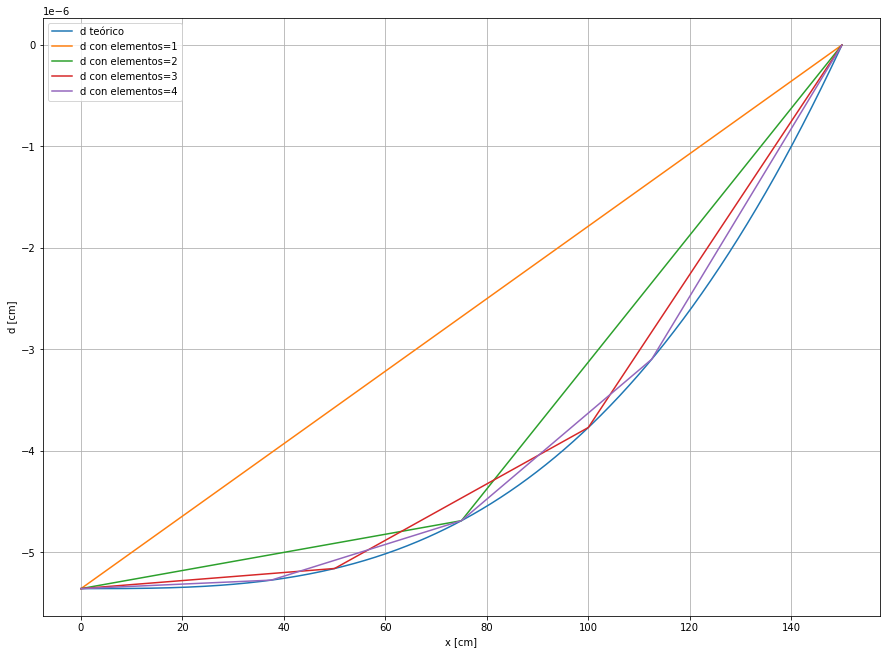

In [14]:
fig, ax = plt.subplots(figsize=(15,11))
x_teo = np.linspace(0,L,500)
plt.plot(x_teo,d_x(x_teo),label='d teórico')

for elemento in range(1,5):
    f, d, Fr = distrib(A, E, C, L, elemento)
    x_exp = np.linspace(0,L,elemento+1)
    plt.plot(x_exp,d,label=f'd con elementos={elemento}')
plt.ylabel('d [cm]')
plt.xlabel('x [cm]')
plt.legend()
plt.grid('on')